In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 1. Stacked Autoencoder

In [7]:
# MNIST 데이터 생성
# ont_hot = True는 Y의 레이블이 1이라면 [0,1,0,0,0,0,0,0,0,0] 처럼 0또는 1로 코딩해주는것
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [8]:
# Neural Net 파라미터 설정
num_hidden_1 = 256 # 첫번째 레이어 개수
num_hidden_2 = 128 # 두번째 레이어 개수
num_input = 784 # MNIST (shape: 28*28)
X = tf.placeholder("float", [None, num_input])

### 함수 정의

random_normal
- 평균이 0이고 표준편차가 1인 정규분포에서의 난수발생
- weights : 가중치 함수 정의
- bias : bias 함수 정의

In [10]:
def weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def bias(shape):
    return tf.Variable(tf.random_normal(shape))

- encoder : layer가 2개인 encoder layer 함수 정의
- decoder : layer가 2개인 decoder layer 함수 정의

In [11]:
def encoder(x):
    layer1 = tf.nn.sigmoid(tf.matmul(x, weights([num_input, num_hidden_1])) + bias([num_hidden_1]))
    layer2 = tf.nn.sigmoid(tf.matmul(layer1, weights([num_hidden_1, num_hidden_2])) + bias([num_hidden_2]))
    return layer2
    
def decoder(x):
    layer1 = tf.nn.sigmoid(tf.matmul(x, weights([num_hidden_2, num_hidden_1])) + bias([num_hidden_1]))
    layer2 = tf.nn.sigmoid(tf.matmul(layer1, weights([num_hidden_1, num_input])) + bias([num_input]))
    return layer2

### Hyper Parameter 및 Layer 구성

In [12]:
# 학습 파라미터 설정
learning_rate = 0.01
num_steps = 30000
batch_size = 256

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# loss(cost) 함수를 만들기 위한 데이터 처리
# Prediction(decoder까지 통과한 variable을 predictor로 설정)
y_pred = decoder_op
# Target 데이터는 input(Image)로 설정
y_true = X

# loss(cost)는 MSE, optimizer는 RMSProp
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

- 기본 학습 Parameter 설정
- autoencoder는 비지도 학습이기 때문에 loss를 계산할 때 실제 x값을 target으로 설정하고 decoder를 통과한 재 구조화된 output을 예측값으로 보고 계산함

### Training

In [13]:
# Initialize the variables (i.e. assign their default value)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 모델 Train
for i in range(1, num_steps+1):
    batch = mnist.train.next_batch(batch_size)
    #Label은 필요 없기 때문에 image만 feed_dict으로 call
    result = sess.run([optimizer, loss], feed_dict={X:batch[0]})
    if i%100 == 0:
        print("step %d, minibatch loss %g"%(i, result[1]))

step 100, minibatch loss 0.164742
step 200, minibatch loss 0.0702121
step 300, minibatch loss 0.0638513
step 400, minibatch loss 0.059021
step 500, minibatch loss 0.0546915
step 600, minibatch loss 0.0507771
step 700, minibatch loss 0.0437936
step 800, minibatch loss 0.0367094
step 900, minibatch loss 0.036019
step 1000, minibatch loss 0.0342591
step 1100, minibatch loss 0.0311699
step 1200, minibatch loss 0.0298048
step 1300, minibatch loss 0.0283626
step 1400, minibatch loss 0.0255249
step 1500, minibatch loss 0.0235763
step 1600, minibatch loss 0.0225316
step 1700, minibatch loss 0.0222778
step 1800, minibatch loss 0.022107
step 1900, minibatch loss 0.02124
step 2000, minibatch loss 0.0214499
step 2100, minibatch loss 0.0186986
step 2200, minibatch loss 0.0197167
step 2300, minibatch loss 0.0185621
step 2400, minibatch loss 0.0171332
step 2500, minibatch loss 0.0181511
step 2600, minibatch loss 0.0160747
step 2700, minibatch loss 0.0163971
step 2800, minibatch loss 0.0161129
step 29

step 22200, minibatch loss 0.00560333
step 22300, minibatch loss 0.00631
step 22400, minibatch loss 0.00654669
step 22500, minibatch loss 0.00577359
step 22600, minibatch loss 0.00606935
step 22700, minibatch loss 0.00540642
step 22800, minibatch loss 0.00643374
step 22900, minibatch loss 0.00615284
step 23000, minibatch loss 0.00551995
step 23100, minibatch loss 0.00596553
step 23200, minibatch loss 0.00523618
step 23300, minibatch loss 0.00575131
step 23400, minibatch loss 0.00610431
step 23500, minibatch loss 0.00582601
step 23600, minibatch loss 0.00583239
step 23700, minibatch loss 0.00587967
step 23800, minibatch loss 0.00520437
step 23900, minibatch loss 0.00579397
step 24000, minibatch loss 0.00512135
step 24100, minibatch loss 0.00544322
step 24200, minibatch loss 0.00631128
step 24300, minibatch loss 0.00542356
step 24400, minibatch loss 0.00580272
step 24500, minibatch loss 0.00588962
step 24600, minibatch loss 0.00571365
step 24700, minibatch loss 0.00584937
step 24800, min

- 학습 횟수가 늘어날수록 loss(cost)가 줄어드는것을 확인 가능

### 결과

Original Images


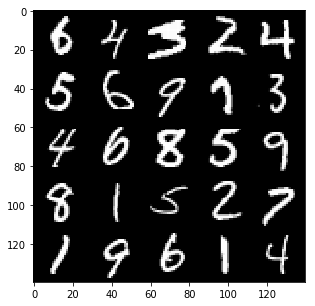

Reconstructed Images


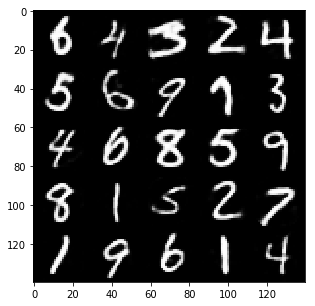

In [82]:
# Test (Encoding and Decoding)
n = 5
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(n):
    batch,_ = mnist.test.next_batch(n)    # 테스트 데이터
    g = sess.run(decoder_op, feed_dict={X: batch})# 테스트 데이터를 학습 한 operator에 적합
    for j in range(n):# 원본 이미지 생성
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch[j].reshape([28, 28])
    for j in range(n): # 재 구조화 된 이미지 생성
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()